In [20]:
import json
import torch
import pandas as pd

with open('C:\\Users\\syu\\Documents\\Efficient_3DCNN\\hongkong\\results\\val.json') as f:
    file = json.load(f)

In [22]:
excel = pd.read_excel('..\\hongkong\\train_data.xlsx')
names = excel['youtube_id'].unique()

label = []
for name in names:
    label.append(excel[excel['youtube_id'] == name]['label'].unique()[0])

excel

,label,youtube_id,time_start,time_end,split
0,Traveling,IMG_0113,321,329,train
1,Traveling,IMG_0113,329,338,train
2,Traveling,IMG_0113,338,347,train
3,Traveling,IMG_0113,347,355,train
4,Traveling,IMG_0113,355,363,train
...,...,...,...,...,...
134,Measuring Rebar,IMG_7230,15,54,train
135,Measuring Rebar,IMG_7230,54,93,train
136,Measuring Rebar,IMG_7230,93,132,train
137,Measuring Rebar,IMG_7230,132,166,train


In [21]:
preds = []

for result in file['results']:
    for ans in file['results'][result]:
        preds.append(ans['label'])
        break

print(preds)

['travelling', 'lifting brick', 'lifting rebar', 'measuring rebar', 'tying rebar', 'hammering', 'drilling', 'hammering', 'travelling', 'lifting brick', 'lifting rebar', 'measuring rebar', 'tying rebar', 'measuring rebar', 'tying rebar', 'hammering', 'drilling', 'hammering', 'travelling', 'lifting brick', 'lifting rebar', 'measuring rebar', 'tying rebar', 'hammering', 'drilling', 'travelling', 'travelling', 'lifting brick', 'lifting brick']


In [28]:
names = {
    'Traveling': 0,
    'Lifting Brick': 1, 
    'Lifting Rebar': 2, 
    'Measuring Rebar': 3, 
    'Tying Rebar': 4, 
    'Hammering': 5, 
    'Drilling': 6, 
    'Idle': 7
}

for i, l in enumerate(label):
    label[i] = names[l]

for i, l in enumerate(preds):
    preds[i] = names[l]



In [29]:
from sklearn.svm import SVC
from sklearn.datasets import make_classification
import numpy as np

preds = np.array(preds)
preds = np.reshape(preds, (-1, 1))
label = np.array(label)
label = np.reshape(label, (-1, 1))

clf = SVC(random_state=0)
clf.fit(preds, label)

c:\Users\syu\miniconda3\envs\torch\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(random_state=0)

c:\Users\syu\miniconda3\envs\torch\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, 'Consfusion matrix')

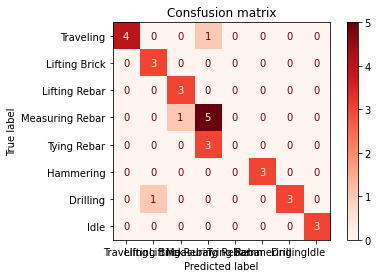

In [34]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
import matplotlib.pyplot as plt

plot = plot_confusion_matrix(
                    clf,
                    label,
                    preds,
                    display_labels = names.keys(),
                    cmap=plt.cm.Reds,
                    normalize=None,
                )
plot.ax_.set_title('Consfusion matrix')